In [1]:
import numpy as np
import cv2
import time
from contextlib import contextmanager

%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import widgets

import os
import sys
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.insert(0, '../')

from src.img_utils import (capture_screenshot, 
                           extract_object, 
                           extract_all_objects)
from src.key_mouse_utils import (move_to,
                                 click,
                                 scroll_up,
                                 scroll_down,
                                 drag,
                                 write,
                                 enter, hit_key,
                                 mouse_up, mouse_down)
from src.visual_bot import VisualBot

In [2]:
@contextmanager
def time_this():
    start = time.time()
    yield
    print(f"Time elapsed: {time.time()-start:.4f}")

In [3]:
def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    global bounding_boxes
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    x1, y1, x2, y2 = [round(x) for x in [x1, y1, x2, y2]]
    bounding_boxes.append((x1, y1))
    bounding_boxes.append((x2, y2))
    bounding_boxes.append([(x1, y1),(x2, y2)])
    click(x1, y1)
    I = capture_screenshot()
    # I = plt.imread()
    plt.imshow(I)
    plt.connect('key_press_event', toggle_selector)
    plt.show()
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))
    
def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

In [4]:
def login() -> None:
    gamebot.click(234, 28) #open new tab
    gamebot.click(206, 17) #close tab
    time.sleep(1)

    gamebot.click(473, 49)
    gamebot.write("https://espritgames.com/wartime/go/")
    gamebot.enter()
    time.sleep(10)

    gamebot.drag(1020, 350, 1020, 380)
    gamebot.click(477, 380)
    gamebot.drag(1020, 350, 1020, 380)
    gamebot.click(477, 380)
    time.sleep(10)

    gamebot.click(657, 149)

In [5]:
def cut_img(I, bbox):
    return I[bbox[0][1]:bbox[1][1],bbox[0][0]:bbox[1][0],:]

In [7]:
gamebot = VisualBot(display=98)
login() # Open the game

Loading text_crop_model weights from checkpoint (../weights/craft_mlt_25k.pth)
Loading text_crop_model weights from checkpoint (/home/tung/pj/sel/deep-text-recognition-benchmark/weights/TPS-ResNet-BiLSTM-CTC.pth)


In [8]:
%matplotlib inline
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import clear_output

max_alive_duration = 1000000
template_root = "../templates/"

marches = 0
join_march_img_1 = plt.imread(template_root+"join_button.png")[...,:3]
join_march_img_2 = plt.imread(template_root+"join_alliance_war_button.png")[...,:3]
employ_troops_button = [348, 698]
march_img = plt.imread(template_root+"march_button.png")[...,:3]
return_button_img = plt.imread(template_root+"return_button.png")[...,:3]
confirm_button_img = plt.imread(template_root+"confirm_blue_button.png")[...,:3]
window_bbox = [[0,0], [1000,300]]
window_title = [[320,77], [685,121]]
clicked = []
captured_img = []
failed = 0
most_recent_attempt = None

37
23
Most recent attempt: 3030.5783076286316s


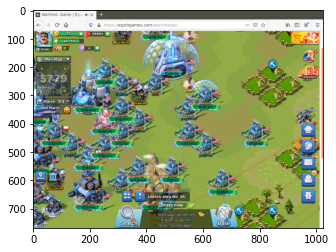

TEXT NOT FOUND!


KeyboardInterrupt: 

In [16]:
start = end = time.time()
print("Starting the bot ...")
while end-start < max_alive_duration:
    
    # Display current screen
    I = gamebot.capture_screenshot()[..., :3]
    plt.imshow(I)
    plt.show()

    # Check if there's an invitation
    bbox = extract_object(join_march_img_1, I)
    if gamebot.extract_text(cut_img(I, bbox), "join")[0] != None and \
       gamebot.extract_text(cut_img(I, window_title), "rally")[0] == None:
        gamebot.click_bbox(bbox)
        clicked.append(bbox)
        gamebot.click_bbox(bbox)
        clicked.append(bbox)
        time.sleep(0.1)
        
        I = gamebot.capture_screenshot()[..., :3]
        captured_img.append(I)
        join_march_found = extract_object(join_march_img_2, cut_img(I, window_bbox))
        print(join_march_found)
        join_march = [501, 191]
        gamebot.click_bbox(join_march_found)
        clicked.append(join_march_found)
#         gamebot.click(*join_march)
        time.sleep(0.5)
        
        I = gamebot.capture_screenshot()[..., :3]
        captured_img.append(I)
        confirm_button = extract_object(confirm_button_img, I)
        if gamebot.extract_text(cut_img(I, confirm_button), "confirm")[0] != None:
            gamebot.click_bbox(confirm_button)
            clicked.append(confirm_button)
    #         gamebot.click(510, 503)
    #         gamebot.click(510, 503)
            time.sleep(0.5)
        
            I = gamebot.capture_screenshot()[..., :3]
            captured_img.append(I)
            print(gamebot.extract_text(I, "battle")[0])
            if gamebot.extract_text(I, "battle")[0] != None:
        #         gamebot.click(*employ_troops_button)
                gamebot.click(*employ_troops_button)
                clicked.append(employ_troops_button)
                time.sleep(0.1)

        #         march = extract_object(march_img, I)
                I = gamebot.capture_screenshot()[..., :3]
                captured_img.append(I)
                march, _ = gamebot.extract_text(I, "battle")
                gamebot.click_bbox(march)
                clicked.append(march)
                gamebot.click_bbox(march)
                clicked.append(march)
                marches += 1
                most_recent_attempt = time.time()
                time.sleep(0.1)
            else:
                failed += 1
        else:
            failed += 1
#         elif gamebot.extract_text(I, "battle")[0] != None:
#             gamebot.click(*employ_troops_button)
#             clicked.append(employ_troops_button)
#             time.sleep(0.1)

#     #         march = extract_object(march_img, I)
#             I = gamebot.capture_screenshot()[..., :3]
#             captured_img.append(I)
#             march, _ = gamebot.extract_text(I, "battle")
#             gamebot.click_bbox(march)
#             clicked.append(march)
#             gamebot.click_bbox(march)
#             clicked.append(march)
#             marches += 1
#             time.sleep(0.1)
        
        I = gamebot.capture_screenshot()[..., :3]
        captured_img.append(I)
        return_button = extract_object(return_button_img, I)
        gamebot.click_bbox(return_button)
        gamebot.click_bbox(return_button)
        clicked.append(return_button)
        I = gamebot.capture_screenshot()[..., :3]
        captured_img.append(I)
        
    
    
    plt.pause(2)
    clear_output()
    show_inline_matplotlib_plots()
    end = time.time()
    print(marches)
    print(failed)
    if most_recent_attempt!= None:
        print(f"Most recent attempt: {time.time() - most_recent_attempt}s")
#     break

In [22]:
join_march_found

((365, 193), (396, 222))

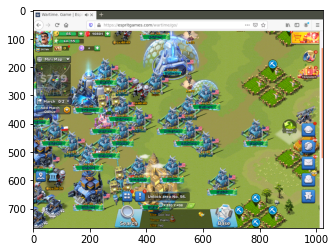

In [15]:
plt.imshow(captured_img[-4])
# clicked[-2], _
# plt.imshow(I)
plt.show()

In [181]:
return_button = extract_object(return_button_img, I)
gamebot.click_bbox(return_button)
gamebot.click_bbox(return_button)
# march

In [239]:
# for i in range(10):
#     template = plt.imread("../templates/donate_button.png")[...,:3]
#     bounding_box = extract_object(template, I)
#     click_bbox(bounding_box)
#     time.sleep(2)
#     print(bounding_box)
# template = plt.imread("../templates/return_button.png")[...,:3]
# bounding_box = extract_object(template, I)
# click_bbox(bounding_box)

In [10]:
%matplotlib widget
f, ax = plt.subplots(figsize=(8,7))
bounding_boxes = []
toggle_selector.RS = widgets.RectangleSelector(ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)

I = gamebot.capture_screenshot()
# I = plt.imread()

plt.imshow(I)
plt.connect('key_press_event', toggle_selector)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [133]:
bounding_box = bounding_boxes[-1]

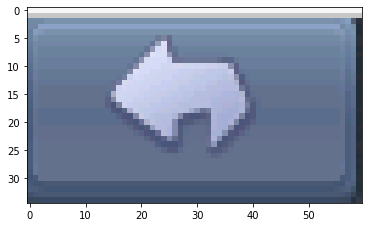

In [136]:
%matplotlib inline
template = I[bounding_box[0][1]:bounding_box[1][1], bounding_box[0][0]:bounding_box[1][0], :][:,:60,:]
# fig = plt.figure(frameon=False, facecolor='white')
# ax = plt.Axes(fig, [0., 0., 1., 1.])
# ax.set_axis_off()
# fig.add_axes(ax)
plt.imshow(template)
# plt.imsave('../templates/wut.png', template)
plt.show()

In [137]:
name = "return_button"
# plt.imsave(f'../templates/{name}.png', template)

In [22]:
%matplotlib widget

with time_this():
    I_copy = I.copy()
#     bounding_boxes = extract_all_objects(template, I[I.shape[0]//2:,:,:])
#     for top_left, bottom_right in bounding_boxes:
#         cv2.rectangle(I_copy, top_left, bottom_right, 255, 2)
    bounding_box = extract_object(template, I)
    top_left, bottom_right = bounding_box
    cv2.rectangle(I_copy, top_left, bottom_right, 255, 2)
    plt.imshow(I_copy)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Time elapsed: 0.0316


In [39]:
bboxes = [[(217, 44), (270, 60)]]

%matplotlib widget

for bbox in bboxes:
    I_copy = I.copy()
    top_left, bottom_right = bbox
    cv2.rectangle(I_copy, top_left, bottom_right, 255, 2)
plt.imshow(I_copy)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
